# **Auction Car Price Prediction** 🚗🚘

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Loading and Data Exploration

---------

## Load Data

In [4]:
dfcar = pd.read_csv('car_prices.csv', on_bad_lines="skip")
dfcar.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Data Dictionary**  
1. Date : The year of production of the cars.  
2. Make : The brand of the car.  
3. Model : The edition of the car of a specific brand.  
4. Trim : The trim levels for a car are just different versions of the model.  
5. Body : The body style of a vehicle refers to the shape and model of a particular car make.  
6. Transmission : The mechanism that moves the power from the engine to the wheels.  
7. VIN : Vehichel identification number.  
8. State : The state in which the car is auctioned.  
9. Condition : The condition of the cars being at the time of auction.  
10. Odometer : The distance the car has travelled since manufactured.  
11. Color : Exterior color of the car.  
12. Interior : Interior color of the car.  
13. Seller : The seller of the car, car dealers.  
14. **mmr : Manhiem Market Report, the market estimated price of the cars. (Target)**
15. sellingprice : The price a car was sold at auctions.  
16. saledate : The date on which the car has been sold.  

## Data Exploration

In [5]:
dfcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [6]:

dfcar.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

1. In total, there are 558,811 entries.
2. The data types are int, float and object, and appear to be in accordance with the columns
3. the data has a few amount of null values comparing to the whole entries 2.4%nulls might consider droping them

In [7]:
# Categorize the features
num = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']
cat = ['make', 'model', 'trim', 'body', 'transmission', 'vin', 'state', 'color', 'interior', 'seller', 'saledate']

# Set display float format
pd.set_option('display.float_format', lambda x: '%.3f' % x)

dfcar[num].describe()

,year,condition,odometer,mmr,sellingprice
count,558811.000,547017.000,558717.000,558811.000,558811.000
mean,2010.039,3.425,68323.196,13769.325,13611.262
std,3.967,0.949,53397.753,9679.875,9749.657
min,1982.000,1.000,1.000,25.000,1.000
25%,2007.000,2.700,28374.000,7100.000,6900.000
50%,2012.000,3.600,52256.000,12250.000,12100.000
75%,2013.000,4.200,99112.000,18300.000,18200.000
max,2015.000,5.000,999999.000,182000.000,230000.000


1. condition has a categorical value between 1-5.
2. The value of the odometer appears to have a large gap between min and max and a gap between mean and median
3. Overall, the mmr and sellingprice values are not very different. However, the min-max and mean-median values are very different.

In [8]:
dfcar[cat].describe()

,make,model,trim,body,transmission,vin,state,color,interior,seller,saledate
count,548510,548412,548160,545616,493458,558811,558811,558062,558062,558811,558811
unique,96,973,1975,86,2,550296,38,20,17,14264,3745
top,Ford,Altima,Base,Sedan,automatic,wbanv13588cz57827,fl,black,black,nissan-infiniti lt,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,93554,19349,55817,199437,475914,5,82945,110970,244325,19693,5334


1. From the data above, we can see at a glance what values are the top ones, appear frequently, and how many unique values each feature has.
2. For example, Ford is the most popular brand among a total of 96 other brands. Apart from that, the sedan body is also one of the most favorite.
3. Automatic transmission is more sought after by customers than manual by more than 90%.
4. Black dominates both the exterior and interior colors.

----------

# EDA (Exploratory Data Analysis)

-------

## UNIVARIATE ANALYSIS

### Unique Value From Some Features

In [9]:
# Check unique value 'year'
dfcar['year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983])

All values are appropriate in the form of numbers starting from 1982 to 2015.

In [10]:
# Check unique value 'make'
dfcar['make'].unique()

array(['Kia', 'BMW', 'Volvo', 'Nissan', 'Chevrolet', 'Audi', 'Ford',
       'Hyundai', 'Buick', 'Cadillac', 'Acura', 'Lexus', 'Infiniti',
       'Jeep', 'Mercedes-Benz', 'Mitsubishi', 'Mazda', 'MINI',
       'Land Rover', 'Lincoln', 'lincoln', 'Jaguar', 'Volkswagen',
       'Toyota', 'Subaru', 'Scion', 'Porsche', nan, 'bmw', 'Dodge',
       'FIAT', 'Chrysler', 'ford', 'Ferrari', 'Honda', 'GMC',
       'mitsubishi', 'Ram', 'smart', 'chevrolet', 'Bentley', 'chrysler',
       'pontiac', 'Pontiac', 'Saturn', 'Maserati', 'Mercury', 'HUMMER',
       'landrover', 'cadillac', 'land rover', 'mercedes', 'mazda',
       'toyota', 'lexus', 'gmc truck', 'honda', 'nissan', 'porsche',
       'Saab', 'Suzuki', 'dodge', 'subaru', 'Oldsmobile', 'oldsmobile',
       'hyundai', 'jeep', 'Isuzu', 'dodge tk', 'Geo', 'acura',
       'volkswagen', 'suzuki', 'kia', 'audi', 'Rolls-Royce', 'gmc',
       'maserati', 'mazda tk', 'mercury', 'buick', 'hyundai tk',
       'mercedes-b', 'vw', 'Daewoo', 'chev truck', 'f

there are words with capital letters, all upper case, and all lower case. Therefore, we will change the values to all lowercase in the next stage. The same thing might also happen to other object type features.

In [11]:
# Check unique value 'trim'
dfcar['trim'].unique()

array(['LX', '328i SULEV', 'T5', ..., 'pure', 'EWB', 'Power Wagon'],
      dtype=object)

### Outliers (year, condition, odometer, MMR, sellingprice)

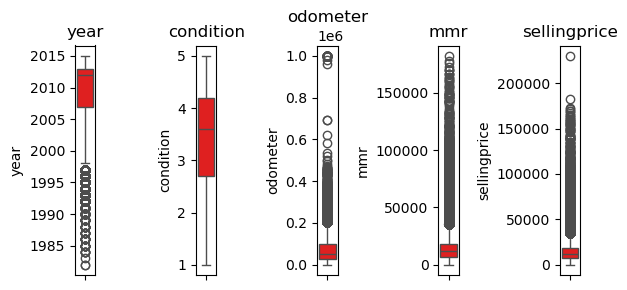

In [12]:
# Outliers

plt.figure(figsize=(6, 3))
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(dfcar[num[i]], color='red', orient='v')
    plt.title(num[i])
    plt.tight_layout()

It can be seen that `mmr` and `sellingprice` have the most outliers, as do the `odometer` and `year` columns. The quartiles and median also seem far away. This can happen because there is a lot of car data (500k++) so the MMR, selling price and odometer values also vary greatly. The column that looks the most normal is the `condition` column.

### Data Distribution (year, condition, odometer, MMR, sellingprice)

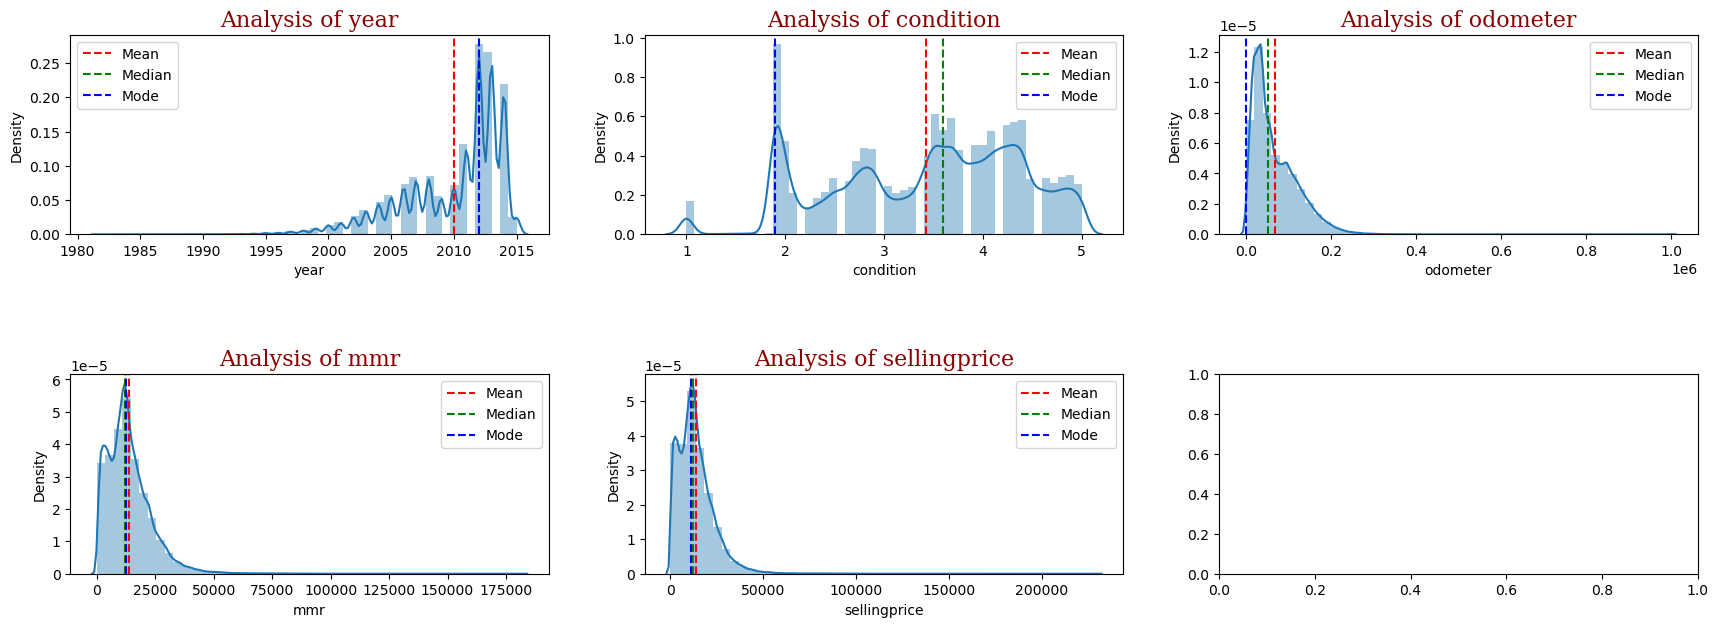

In [13]:
def generate_distribution_plot(train_df, continuous_features):
    # create copy of dataframe
    data = train_df[continuous_features].copy()
    # Create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=3,figsize=(21,7))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

    # Generate distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='--', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='--', label="Mode")
        ax.legend()
    plt.show()

generate_distribution_plot(dfcar, num)

From the graph above we can conclude:
1. From the `year` column we can see that sales tend to increase every year and peak sales were between 2010 and 2015. We can also see that the `year` column is left-skewed.
2. In the `condition` column, the condition of the car that is in the range of number 2 is the majority of the other conditions. This shows that the condition of the used car isn't good. However, there are quite a few cars in the condition that are rated 3 or above to 4.
3. For the 'odometer', it can be seen that the majority are in the numbers 0 to 0.2, which means the odometer ranges from 0 to 200k. Meanwhile, using cars over 200k is relatively rare.
4. The `mmr` and `sellingprice` columns look similar.
5. The `odometer`, `mmr`, and `sellingprice` columns are right-skewed.

### Checking Abnormal Values

Like the previous analysis where we found min and max values that seemed unreasonable, we will further check the data containing these values.

The columns are `odometer`, `mmr`, and `sellingprice`.

**1. Min and Max From Odometer**

In [14]:
# Rows with 'odometer' = 1 (min)
min_odo = dfcar[dfcar['odometer'] == 1.000]
min_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
234490,1996,NaN,NaN,NaN,NaN,automatic,1b4gp44r2tb472684,fl,2.000,1.000,green,gray,lorenzo bomnin chevrolet,850,300,Tue Feb 03 2015 01:33:00 GMT-0800 (PST)
66526,2007,Chrysler,Sebring,Base,Sedan,automatic,1c3lc46k47n550663,fl,1.800,1.000,blue,gray,orlando kia east,5700,1500,Wed Jul 01 2015 05:30:00 GMT-0700 (PDT)
129747,2005,Pontiac,Grand Prix,Base,Sedan,NaN,2g2wp542651309843,ga,2.000,1.000,black,—,titlemax/forest park ga1,5225,300,Thu Jan 15 2015 12:30:00 GMT-0800 (PST)


In [15]:
# Rows with 'odometer' = 999999 (max)
max_odo = dfcar[dfcar['odometer'] == 999999.000]
max_odo.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
367686,2005,BMW,6 Series,645Ci,Convertible,automatic,wbaek73475b326491,il,1.000,999999.000,silver,gray,santander consumer,5575,1650,Tue Mar 03 2015 05:00:00 GMT-0800 (PST)
245595,2005,Kia,Sedona,EX,Minivan,automatic,kndup131556647473,oh,1.000,999999.000,blue,tan,credit acceptance corp/vrs/southfield,100,200,Thu Feb 12 2015 01:00:00 GMT-0800 (PST)
452007,2007,NaN,NaN,NaN,NaN,manual,jm1fe173870213192,tx,2.300,999999.000,red,tan,wells fargo dealer services,3575,1200,Wed May 27 2015 05:30:00 GMT-0700 (PDT)


From the min and max of the `odometer` column above, it can be seen that the data not only contains min and max values that are far away but other columns are also abnormal. This can be seen from the sample above where the min and max rows also contain many null values, low mmr and selling price values, and poor conditions.

**2. Min from Selling Price**

In [16]:
# Rows with 'sellingprice' = 1 (min)
min_price = dfcar[dfcar['sellingprice'] == 1.000]
min_price

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7566,2002,Ford,F-350 Super Duty,XLT,Crew Cab,NaN,1ftsw31f52ed16477,ca,2.000,NaN,white,gray,laa leasing,7850,1,Thu Feb 05 2015 04:00:00 GMT-0800 (PST)
48453,2003,Mercedes-Benz,E-Class,E500,Sedan,automatic,wdbuf70j73a269529,ga,2.100,1.000,black,black,peoples credit company inc,7325,1,Tue Jan 06 2015 09:30:00 GMT-0800 (PST)
293223,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew6eda13643,tx,4.100,31886.000,white,gray,u-haul,20800,1,Thu Feb 12 2015 03:00:00 GMT-0800 (PST)
348252,1995,Isuzu,Rodeo,LS,SUV,NaN,4s2cm58v9s4375559,va,1.000,254132.000,red,gray,automotive remarketing inc,375,1,Wed Mar 04 2015 01:05:00 GMT-0800 (PST)


**3. Min from MMR**

In [17]:
# Rows with 'mmr' = 25 (min)
min_mmr = dfcar[dfcar['mmr'] == 25.000]
min_mmr.sample(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
28688,2000,Chevrolet,Tahoe,LS,SUV,automatic,1gnec13t4yj164096,sc,NaN,347449.000,white,gray,five star florence llc,25,900,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
440107,2002,Saab,9-5,Arc 3.0t,Sedan,automatic,ys3ed49z623031038,fl,2.100,171964.000,silver,black,courtesy kia of brandon,25,800,Thu May 21 2015 09:20:00 GMT-0700 (PDT)
205709,1997,Nissan,Maxima,GLE,Sedan,automatic,jn1ca21d3vt870132,fl,1.900,220607.000,black,tan,autonation nissan orange park,25,300,Tue Jan 27 2015 10:00:00 GMT-0800 (PST)


## MULTIVARIATE ANALYSIS

### Correlation Heatmap

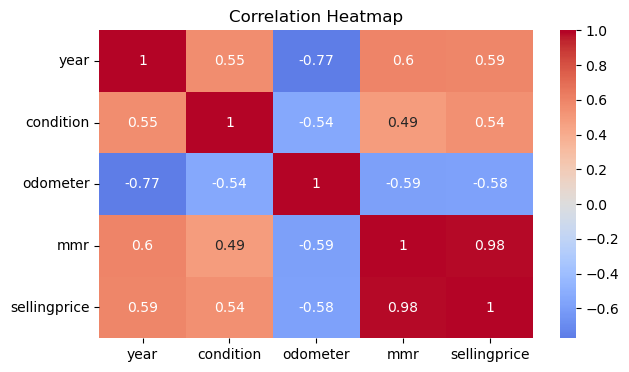

In [18]:


# Calculate the correlation matrix for numerical columns
corr_matrix = dfcar.select_dtypes(include=['number']).corr()

# Plot the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


1. The correlation between `year` and `sellingprice` is positive, indicating that the newer the car, the higher the selling price.
2. The `condition` column has a positive correlation with `sellingprice`, which means the better the condition of the car, the higher the selling price.
3. The `odometer` column has a negative correlation with `sellingprice`, indicating that the less mileage, the higher the selling price.
4. The `mmr` column has a fairly strong positive correlation with `sellingprice`, indicating that the selling price predicted by MMR has a good correlation with the actual selling price.
5. The 'Year' and 'Odometer' columns also show a fairly high negative correlation, meaning that the latest cars have odometers that tend to be small

----------

# Data Preparation

----

## Data Cleansing

### Dropping

**Rows with Abnormal Values**

In [19]:
dfcar2 = dfcar.copy()

In [20]:
# Drop nilai min odo
i_min_odo = dfcar2[((dfcar2.odometer == 1.000))].index
dfcar2 = dfcar2.drop(i_min_odo)

In [21]:
# Drop nilai max odo
i_max_odo = dfcar2[((dfcar2.odometer == 999999.000))].index
dfcar2 = dfcar2.drop(i_max_odo)

In [22]:
# Drop nilai min sellingprice
i_min_price = dfcar2[((dfcar2.sellingprice == 1.000))].index
dfcar2 = dfcar2.drop(i_min_price)

In [23]:
# Drop nilai min mmr
i_min_mmr = dfcar2[((dfcar2.mmr == 25.000))].index
dfcar2 = dfcar2.drop(i_min_mmr)

In [24]:
dfcar2.shape

(557391, 16)

**Irrelevant Features**

Some features seem less relevant and their unique value is too broad, as we have analyzed previously. So it is assumed that these features do not have a particular pattern. These features are `vin`, `sellingprice`, and `saledate` which will be removed. The reasons are:  
a. `vin` is not a feature that determines the price of a car because it's juts the identification number for the car.  
b. `sellingprice` has a high correlation (0.98) with `mmr` (target feature).  
c. `saledate` does not show a significant factor because the time is too broad and uncertain so there is no special pattern that influences the selling price of a car.

In [25]:
# Delete the irrelevant features
dfcar2 = dfcar2.drop(['vin','sellingprice','saledate'], axis=1)
dfcar2.head(3)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,16639.000,white,black,"kia motors america, inc",20500
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.000,9393.000,white,beige,"kia motors america, inc",20800
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.500,1331.000,gray,black,financial services remarketing (lease),31900


### Handle Unique Values

In some features there are many unique values as previously explored. We will handle unique values into:  
1. All categorical data except saledate will be changed to lower case to get the same unique value.  
2. The " — " value in the `color` and `interior` features will be replaced with the na value to be dropped later

In [26]:
def content_consistent(df):
    cols = df.select_dtypes(object).columns.difference(['saledate'])
    df[cols] = df[cols].apply(lambda x: x.str.lower())
    return df

dfcar2 = content_consistent(dfcar2)

In [27]:
import re

# Replace color and interior
dfcar2['color'].replace('—',np.nan,inplace=True)
dfcar2['interior'].replace('—',np.nan,inplace=True)

# Replace model dan trim by remove special characters
dfcar2['model'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['trim'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)
dfcar2['seller'].replace(to_replace='[^A-Za-z0-9 ]+', value='', regex=True, inplace=True)

# Replace same meaning of value
dfcar2['make'].replace('landrover','land rover',inplace=True)
dfcar2['make'].replace('mercedes-b','mercedes-benz',inplace=True)
dfcar2['make'].replace('mercedes','mercedes-benz',inplace=True)
dfcar2['make'].replace('vw','volkswagen',inplace=True)
dfcar2['make'].replace('ford tk','ford truck',inplace=True)
dfcar2['body'].replace('koup','coupe',inplace=True)
dfcar2['body'].replace('regular-cab','regular cab',inplace=True)
dfcar2['body'].replace('xtracab','extended cab',inplace=True)

In [28]:
# View the results of handling value and column inconsistencies
c = ['make', 'model', 'trim', 'body', 'color', 'interior', 'state', 'seller']

dfcar2[c].describe()

,make,model,trim,body,color,interior,state,seller
count,547162,547064,546817,544286,531988,539767,557391,557391
unique,61,841,1883,42,19,16,38,14152
top,ford,altima,base,sedan,black,black,fl,nissaninfiniti lt
freq,93834,19322,55641,240696,110725,244000,82780,19691


After cleaning the data by generalizing the string writing, the results are visible:  
a. `make` which was originally 96 now only has 61 unique values  
b. `model` which was originally 973 now only has 841 unique values  
c. `trim` which was originally 1975 now only has 1883 unique values  
d. `body` which was originally 86 now only has 42 unique values  
e. `seller` which was originally 14264 now only has 14152 unique values  
f. `color` and `interior` are reduced by 1 value from the previous unique value because they have been replaced by the mode value (-).  
g. `state` is the only one that still has the same value.

### Handle Missing Values

There are 9 features that have Null values, they are `make`, `model`, `trim`, `body`, `transmission`, `condition`, `odometer`, `color`, `interior`.  

1. All missing data will be dropped.  

In [29]:
# Existing columns that had null values
cols = ['make', 'model', 'trim', 'body', 'transmission', 'color', 'interior']

# Drop all rows containing null in the specified columns
dfcar2.dropna(subset=cols, inplace=True)


In [30]:
# Imputation of null values dropping nulls 
dfcar2.dropna(subset=['condition'], inplace=True)

In [31]:
# Removes remaining null values
dfcar2.dropna(axis=0, inplace=True)
dfcar2.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
dtype: int64

In [32]:
df_clean = dfcar2.copy()

## Feature Engineering

### Feature Extraction

Because the dataset contains many categorical features, we need to convert them first into numbers. But before that, we need to carry out feature extraction to see patterns that can simplify the feature encoding.

#### 1. Overall
Overall rating of the car, grouped by the mean of MMR from `condition` and `odometer`.

In [33]:
df_yearcond = df_clean.groupby(['condition', 'odometer']).agg({'mmr' : ['mean','median']})
df_yearcond.describe()

mmr           
            mean     median
count 407335.000 407335.000
mean   13480.496  13474.128
std     9260.965   9258.341
min       50.000     50.000
25%     7075.000   7075.000
50%    12100.000  12100.000
75%    17900.000  17875.000
max   182000.000 182000.000

In [34]:
def segment(x):
    if x['odometer'] <= 7200:
        segment = 'Poor'
    elif x['odometer'] > 7200 and x['odometer'] <= 12150:
        segment = 'Fair'
    elif x['odometer'] > 12150 and x['odometer'] <= 17600:
        segment = 'Good'
    else:
        segment = 'Very Good'
    return segment

df_clean['Overall'] = df_clean.apply(lambda x: segment(x), axis=1)

#### 2. Made In

Simplify the value in the `make` feature by categorizing car brands according to the country of origin.

In [35]:
# Car brand groups based on country of origin
us_made = ['chevrolet', 'ford', 'buick', 'cadillac', 'jeep', 'dodge', 'chrysler', 'ram', 'scion', 'pontiac', 'saturn', 'mercury', 'hummer', 'gmc', 'gmc truck',
           'oldsmobile', 'ford truck', 'lincoln', 'plymouth', 'airstream']
germany_made = ['bmw', 'audi', 'mercedes-benz', 'porsche', 'smart', 'chev truck', 'volkswagen']
japan_made = ['nissan', 'acura', 'lexus', 'infiniti', 'mitsubishi', 'mazda', 'toyota', 'subaru', 'honda', 'suzuki', 'isuzu', 'mazda tk']
uk_made = ['mini', 'land rover', 'jaguar']
italy_made = ['fiat', 'maserati']
korea_made = ['kia', 'hyundai', 'hyundai tk', 'daewoo']
swedia_made = ['volvo', 'saab']

made_in = []

for maker in df_clean['make']:
    if maker in us_made:
        country = 'US'
    elif maker in germany_made:
        country = 'DEU'
    elif maker in japan_made:
        country = 'JPN'
    elif maker in uk_made:
        country = 'UK'
    elif maker in italy_made:
        country = 'ITA'
    elif maker in korea_made:
        country = 'KOR'
    else:
        country = 'SWE'

    made_in.append(country)

df_clean['made_in'] = made_in

#### 3. Top Make
Brand segmentation based on 11 top brands. The rest of them will be labelled as 'Other'.

In [36]:
# Top Brand based on Year of making
top_make = df_clean.groupby('make')['year'].count().reset_index().sort_values('year', ascending=False)
top_make = top_make.iloc[:11]
top_make.drop('year', axis=1, inplace=True)
top_make['top_make'] = top_make['make']
top_make

,make,top_make
14,ford,ford
7,chevrolet,chevrolet
36,nissan,nissan
50,toyota,toyota
10,dodge,dodge
17,honda,honda
19,hyundai,hyundai
4,bmw,bmw
24,kia,kia
8,chrysler,chrysler


In [37]:
df_clean = df_clean.merge(top_make, how='left', on='make')
df_clean['top_make'].fillna('Other', inplace=True)
df_clean['top_make'].unique()

array(['kia', 'bmw', 'Other', 'nissan', 'chevrolet', 'ford', 'hyundai',
       'infiniti', 'toyota', 'dodge', 'chrysler', 'honda'], dtype=object)

### Feature Selection

In [38]:
# Select the features
df_clean = df_clean.drop(['make', 'transmission','seller'], axis=1)
df_clean.head(3)

,year,model,trim,body,state,condition,odometer,color,interior,mmr,Overall,made_in,top_make
0,2015,sorento,lx,suv,ca,5.000,16639.000,white,black,20500,Good,KOR,kia
1,2015,sorento,lx,suv,ca,5.000,9393.000,white,beige,20800,Fair,KOR,kia
2,2014,3 series,328i sulev,sedan,ca,4.500,1331.000,gray,black,31900,Poor,DEU,bmw


## Train-Test Split

In [39]:
df_new = df_clean.copy()

In [40]:
# Load the data


# Display unique values for each column
for column in df_new.columns:
    unique_values = df_new[column].unique()
    print(f"Feature: {column}")
    print(f"Number of unique values: {len(unique_values)}")
    print(f"Unique values: {unique_values[:100]}")  # Show first 10 unique values
    print("-" * 50)


Feature: year
Number of unique values: 26
Unique values: [2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 2005 2004 2003 2002
 2001 2000 1999 1998 1996 1995 1997 1994 1993 1992 1991 1990]
--------------------------------------------------
Feature: model
Number of unique values: 759
Unique values: ['sorento' '3 series' 's60' '6 series gran coupe' 'altima' 'm5' 'cruze'
 'a4' 'camaro' 'a6' 'optima' 'fusion' 'q5' '6 series' 'impala' '5 series'
 'a3' 'xc70' 'sq5' 's5' 'suburban' 'elr' 'v60' 'x6' 'ilx' 'k900' 'malibu'
 'rx 350' 'versa' 'elantra' 'versa note' 'a8' 'x1' 'enclave' 'tts'
 '4 series' 'mdx' 'silverado 1500' 'srx' 'x5' 'g coupe' 'g sedan' 'fx'
 'santa fe' 'genesis' 'equus' 'sonata' 'sonata hybrid' 'accent' 'veloster'
 'elantra coupe' 'azera' 'tucson' 'genesis coupe' 'wrangler' 'sclass'
 'gs 350' 'outlander' 'mazda2' 'rio' 'cclass' '370z' 'soul'
 'outlander sport' 'es 350' 'eclass' 'mazda3' 'cooper clubman' 'cx9'
 'forte' 'compass' 'jx' 'lr4' 'mazda5' 'm' 'cooper' 'range rover evo

In [41]:
df_new.describe()

,year,condition,odometer,mmr
count,439433.000,439433.000,439433.000,439433.000
mean,2010.148,3.414,67678.007,13660.393
std,3.824,0.940,50965.824,9436.111
min,1990.000,1.000,2.000,50.000
25%,2008.000,2.700,28936.000,7275.000
50%,2012.000,3.600,52596.000,12200.000
75%,2013.000,4.200,97978.000,18050.000
max,2015.000,5.000,980113.000,182000.000


In [42]:
from sklearn.model_selection import train_test_split

# Split the data
features = df_clean.select_dtypes(["float64", "int64", "boolean", "uint8",'string','object']).columns
x = df_clean[features].drop('mmr', axis=1)
y = df_clean.mmr
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

#### Target Encoding
Target encoding is performed on several features to maintain important information contained in category features, especially in the context of target predictions.

In [43]:
# Define which columns you want to target-encode
cols = ['model', 'trim', 'body', 'state']
from category_encoders import *
# Create the target encoder
encoder = TargetEncoder()
# Fit on xtrain (with ytrain) and transform xtrain
xtrain[cols] = encoder.fit_transform(xtrain[cols], ytrain)

# Transform xtest using the same encoder
xtest[cols] = encoder.transform(xtest[cols])


#### Count Encoding
This method is used for categorical features where each category is replaced by its frequency of occurrence.

In [44]:
# # Count encoding for 'seller'
# seller_counts = xtrain['seller'].value_counts().to_dict()
# xtrain['seller'] = xtrain['seller'].map(seller_counts)
# # For the test set, use the same mapping. Handle unknown categories (NaN) as needed:
# xtest['seller'] = xtest['seller'].map(seller_counts).fillna(0)

# Count encoding for 'color'
color_counts = xtrain['color'].value_counts().to_dict()
xtrain['color'] = xtrain['color'].map(color_counts)
xtest['color'] = xtest['color'].map(color_counts).fillna(0)

# Count encoding for 'interior'
interior_counts = xtrain['interior'].value_counts().to_dict()
xtrain['interior'] = xtrain['interior'].map(interior_counts)
xtest['interior'] = xtest['interior'].map(interior_counts).fillna(0)


#### One-Hot Encoding  

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False )
ohe_cols = ['Overall', 'made_in', 'top_make']

# Fit on the training data, then transform xtrain
ohe.fit(xtrain[ohe_cols])
xtrain_ohe = ohe.transform(xtrain[ohe_cols])
ohe_feature_names = ohe.get_feature_names_out(ohe_cols)

# Convert to DataFrame
xtrain_ohe_df = pd.DataFrame(xtrain_ohe, columns=ohe_feature_names, index=xtrain.index)
# Drop the original columns and concatenate
xtrain.drop(columns=ohe_cols, inplace=True)
xtrain = pd.concat([xtrain, xtrain_ohe_df], axis=1)

# Transform xtest similarly
xtest_ohe = ohe.transform(xtest[ohe_cols])
xtest_ohe_df = pd.DataFrame(xtest_ohe, columns=ohe_feature_names, index=xtest.index)
xtest.drop(columns=ohe_cols, inplace=True)
xtest = pd.concat([xtest, xtest_ohe_df], axis=1)

### Pre-Processing

In [46]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler    = StandardScaler()
n = ['year', 'odometer', 'condition']
xtrain[n] = scaler.fit_transform(xtrain[n])
xtest[n] = scaler.transform(xtest[n])

# Modelling and Evaluation

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

# Function to plot learning curves for R² and MAE
def plot_learning_curves(model, X_train, y_train, X_test, y_test, metric, metric_name):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        # Determine the size of the training subset
        subset_size = int(train_size * len(X_train))
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        # Fit the model on the training subset
        model.fit(X_train_subset, y_train_subset)

        # Predict on the training and testing sets
        y_train_pred = model.predict(X_train_subset)
        y_test_pred = model.predict(X_test)

        # Calculate the metric for training and testing sets
        train_scores.append(metric(y_train_subset, y_train_pred))
        test_scores.append(metric(y_test, y_test_pred))

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores, label="Training Score", marker="o")
    plt.plot(train_sizes, test_scores, label="Testing Score", marker="o")
    plt.title(f"Learning Curve: {metric_name}")
    plt.xlabel("Fraction of Training Data")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

## Modelling

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to display model evaluation scores
def eval_regression(model, y_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE: " , mean_absolute_error(ytest, y_pred))
    print("RMSE: " , mean_squared_error(ytest, y_pred, squared=False))
    print('R2 score: ', r2_score(ytest, y_pred))
    print('Coefficients: ', regressor.coef_)
    print('Intercept: ', regressor.intercept_)

### Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

# Train model linear regression
regressor = LinearRegression()
regressor.fit(xtrain, ytrain)

LinearRegression()

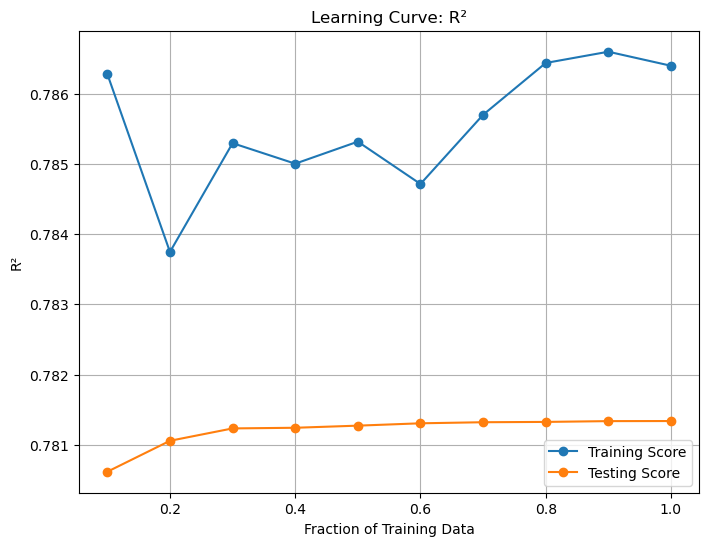

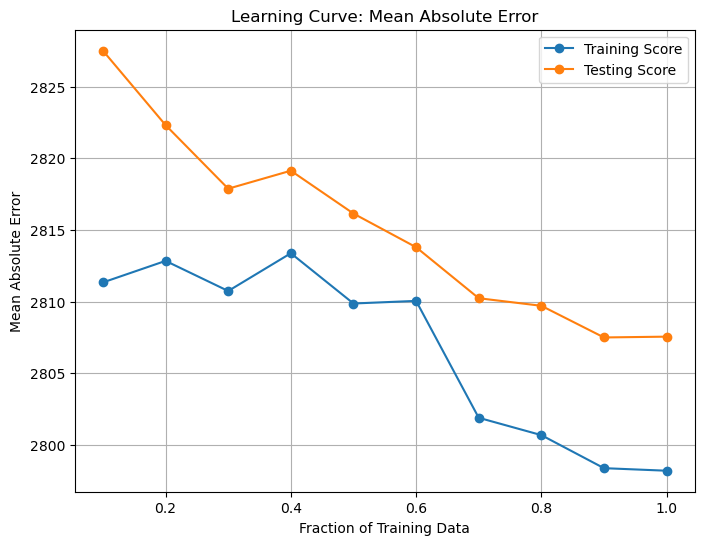

In [50]:
# Plot learning curves for R²
plot_learning_curves(regressor, xtrain.values, ytrain.values, xtest.values, ytest.values, r2_score, "R²")

# Plot learning curves for MAE
plot_learning_curves(regressor, xtrain.values, ytrain.values, xtest.values, ytest.values, mean_absolute_error, "Mean Absolute Error")


In [51]:
# Predict
y_pred = regressor.predict(xtest)

# Show the evaluation
eval_regression(regressor, y_pred, xtrain, xtest, ytrain, ytest)

MAE:  2807.5469724020445
RMSE:  4413.64502984821
R2 score:  0.7813400455027217
Coefficients:  [ 2.24649572e+03  5.95264513e-01  4.10186838e-01  3.36779926e-01
  6.64763317e-02  3.71275527e+02 -2.29109687e+03  4.12061049e-03
 -2.90463936e-03  2.47328771e+02 -2.50909500e+01  1.44754516e+03
 -1.66978298e+03  5.37272191e+02 -1.13298906e+03  7.98016204e+02
 -5.15392933e+03  4.23447842e+03  4.69720589e+02  2.47430987e+02
  3.78683475e+02  2.30642065e+02  7.00141424e+01 -4.88812877e+02
 -4.52072623e+02 -1.39824876e+03  5.96169326e+02  3.82955386e+03
 -3.97346647e+03  3.14425613e+03 -1.48265736e+03 -4.54060904e+02]
Intercept:  -3931.862080817624


### Random Forest Regression

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Training model random forest
rf = RandomForestRegressor(random_state=104 , verbose=False, oob_score=True )
rf.fit(xtrain, ytrain)

RandomForestRegressor(oob_score=True, random_state=104, verbose=False)

In [53]:
# Predict
ytrain_pred = rf.predict(xtrain)
ytest_pred = rf.predict(xtest)
print("OOB R² score:", rf.oob_score_)

OOB R² score: 0.9784051387181605


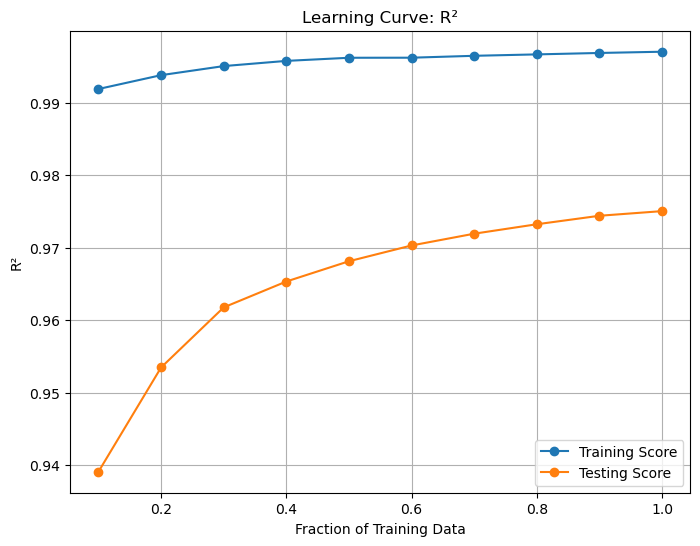

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import learning_curve

# Function to plot learning curves for R² and MAE
def plot_learning_curves(model, X_train, y_train, X_test, y_test, metric, metric_name):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        # Determine the size of the training subset
        subset_size = int(train_size * len(X_train))
        X_train_subset = X_train[:subset_size]
        y_train_subset = y_train[:subset_size]

        # Fit the model on the training subset
        model.fit(X_train_subset, y_train_subset)

        # Predict on the training and testing sets
        y_train_pred = model.predict(X_train_subset)
        y_test_pred = model.predict(X_test)

        # Calculate the metric for training and testing sets
        train_scores.append(metric(y_train_subset, y_train_pred))
        test_scores.append(metric(y_test, y_test_pred))

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores, label="Training Score", marker="o")
    plt.plot(train_sizes, test_scores, label="Testing Score", marker="o")
    plt.title(f"Learning Curve: {metric_name}")
    plt.xlabel("Fraction of Training Data")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid()
    plt.show()

# Plot learning curves for R²
plot_learning_curves(rf, xtrain.values, ytrain.values, xtest.values, ytest.values, r2_score, "R²")

# Plot learning curves for MAE



In [ ]:
def evaluasi(model, ytrain_pred, ytest_pred, xtrain, xtest, ytrain,  ytest):
    print("MAE train: " , mean_absolute_error(ytrain, ytrain_pred))
    print("MAE test: " , mean_absolute_error(ytest, ytest_pred))
    print("RMSE train: " , mean_squared_error(ytrain, ytrain_pred, squared=False))
    print("RMSE test: " , mean_squared_error(ytest, ytest_pred, squared=False))
    print('R2 score train: ', r2_score(ytrain, ytrain_pred))
    print('R2 score test: ', r2_score(ytest, ytest_pred))

evaluasi(rf, ytrain_pred, ytest_pred, xtrain, xtest, ytrain, ytest)

MAE train:  449.6073978331787
MAE test:  727.2899869361071
RMSE train:  812.5779461070385
RMSE test:  1539.2754999836332
R2 score train:  0.9925833625325698
R2 score test:  0.9734045609883184


### XGBoost

In [61]:
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# Create the base estimator
xgb_base = XGBRegressor()

# Wrap it with AdaBoost
adaboost_model = AdaBoostRegressor(estimator=xgb_base, n_estimators=200, learning_rate=0.01)

# Train the AdaBoost model
adaboost_model.fit(xtrain, ytrain)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_train_pred = adaboost_model.predict(xtrain)
y_test_pred = adaboost_model.predict(xtest)

# Metrics
mae_train = mean_absolute_error(ytrain, y_train_pred)
mae_test = mean_absolute_error(ytest, y_test_pred)
rmse_train = mean_squared_error(ytrain, y_train_pred, squared=False)
rmse_test = mean_squared_error(ytest, y_test_pred, squared=False)
r2_train = r2_score(ytrain, y_train_pred)
r2_test = r2_score(ytest, y_test_pred)

print(f"MAE Train: {mae_train}")
print(f"MAE Test: {mae_test}")
print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")
print(f"R2 Train: {r2_train}")
print(f"R2 Test: {r2_test}")


MAE Train: 963.5506179021025
MAE Test: 1001.0647312288829
RMSE Train: 1531.2200346239206
RMSE Test: 1793.0604828871494
R2 Train: 0.973663866519928
R2 Test: 0.9639118909835815


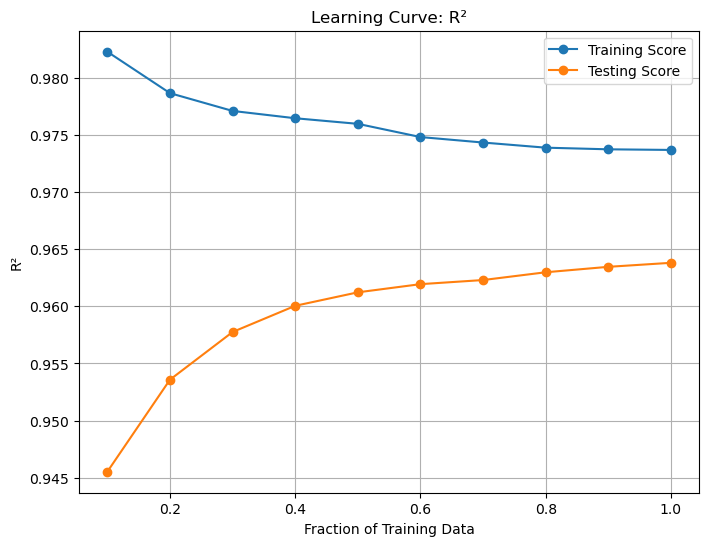

In [62]:
plot_learning_curves(adaboost_model, xtrain.values, ytrain.values, xtest.values, ytest.values, r2_score, "R²")

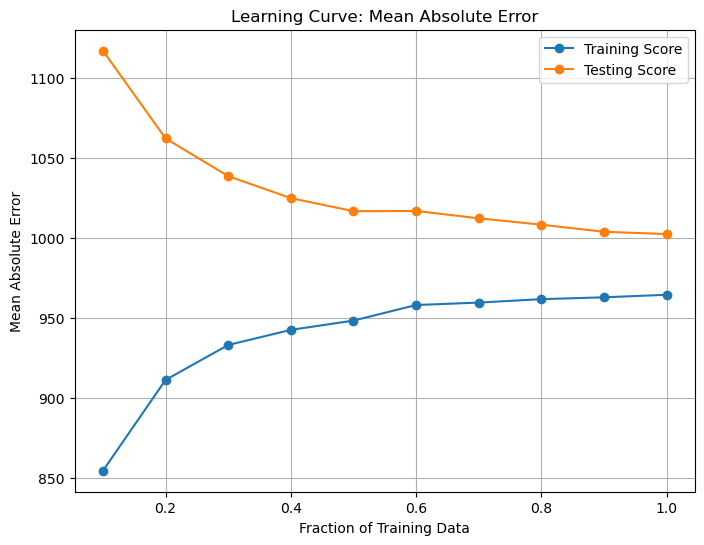

In [63]:
plot_learning_curves(adaboost_model, xtrain.values, ytrain.values, xtest.values, ytest.values, mean_absolute_error, "Mean Absolute Error")

The best model is the **Random Forest** model because it has the highest R2 score and the smallest MAE and RMSE among the other models.

# Learning curve for the models

In [ ]:
# Save the model, scaler, and encoders
import joblib

# Save the Random Forest model
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(xtrain.columns, 'feature_names.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the encoders
joblib.dump(encoder, 'target_encoder.pkl')
joblib.dump(ohe, 'one_hot_encoder.pkl')

# Save count encoding mappings
joblib.dump(color_counts, 'color_counts.pkl')
joblib.dump(interior_counts, 'interior_counts.pkl')
feature_names = joblib.load('feature_names.pkl') 


In [ ]:
import requests

# Test the endpoint with all required features
url = "http://127.0.0.1:8000/predict"
sample_input = {
    "year": 2014,
    "condition": 3,
    "odometer": 45000,
    "model": "corolla",
    "trim": "le",
    "body": "sedan",
    "state": "ca",
    "color": "white",
    "interior": "gray",
    "make": "toyota"
}


response = requests.post(url, json=sample_input)

print(response.json())


In [ ]:
import requests

url = "http://127.0.0.1:8000/predict"
sample_input = {
    "year": 2015,
    "make": "kia",
    "model": "Sorento",
    "trim": "LX",
    "body": "suv",
    "state": "CA",
    "condition": 5,
    "odometer": 16639,
    "color": "white",
    "interior": "black"
}

response = requests.post(url, json=sample_input)
print(response.json())


{'detail': 'Not Found'}


In [ ]:
import numpy as np

data_point = xtest.iloc[3]  

# Get predictions from all trees in the forest for the selected data point
tree_predictions = np.array([tree.predict(data_point.values.reshape(1, -1))[0] for tree in rf.estimators_])

# Calculate the mean and standard deviation of the predictions
mean_prediction = np.mean(tree_predictions)
std_prediction = np.std(tree_predictions)

print(f"Prediction: {mean_prediction:.2f}")
print(f"Standard Deviation (Uncertainty): {std_prediction:.2f}")

# 95% Prediction Interval
lower_bound = mean_prediction - 1.96 * std_prediction
upper_bound = mean_prediction + 1.96 * std_prediction
print(f"95% Prediction Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")


Prediction: 4193.00
Standard Deviation (Uncertainty): 549.24
95% Prediction Interval: [3116.49, 5269.51]
